In [27]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

In [21]:
# reload(Reader)

In [22]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "2"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [23]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (4257, 75)
speed.shape: (4257, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

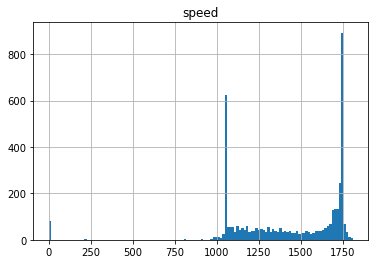

In [24]:
speed.hist(bins=128)

feature.shape: (4137, 75)
speed.shape: (4137, 1)


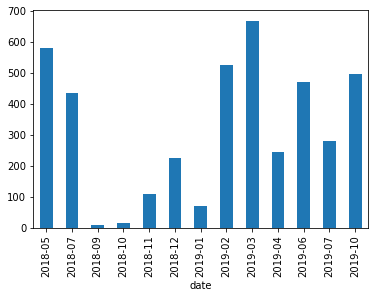

In [25]:
feature = feature[speed.speed >= 1000]
speed = speed[speed.speed >= 1000]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [26]:
# 划分train set, test set
feature_train = feature["2018-05": "2019-04"]
speed_train = speed["2018-05": "2019-04"]

feature_test = feature["2019-06": "2019-10"]
speed_test = speed["2019-06": "2019-10"]

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (2887, 75)
speed_train.shape: (2887, 1)
feature_test.shape: (1250, 75)
speed_test.shape: (1250, 1)


In [28]:
detector = model_entry.OutlierDetector()

In [29]:
detector.fit(feature_train)

<AxesSubplot:xlabel='date'>

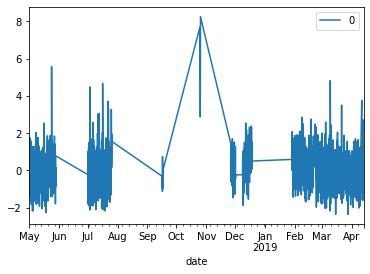

In [30]:
detector.decision_scores.plot()

In [31]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

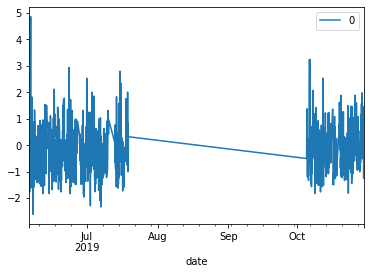

In [32]:
anomaly_scores.plot()

In [35]:
anomaly_scores[anomaly_scores[0] >= 4]

,0
date,
2019-06-06 09:00,4.858876


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

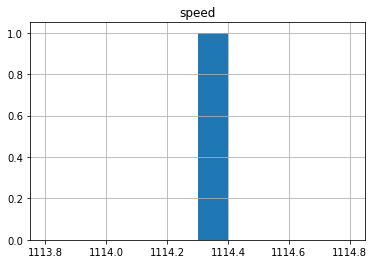

In [33]:
speed_test[speed_test.index.isin(anomaly_scores[anomaly_scores[0] >= 4].index)].hist()

In [34]:
speed_test[speed_test.index.isin(anomaly_scores[anomaly_scores[0] >= 4].index)]

,speed
date,
2019-06-06 09:00,1114.3
